In [20]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

import numpy as np
import matplotlib.pyplot as plt

import os

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

## Exercise 11.2

The aim of this second exercise is to obtain a reasonable fit of the following polynomial of order 3: $f(x)=4-3x-2x^2+3x^3$ for $x \in [-1,1]$ and explore how the results change under the choise of:
- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function

I chose $1000$ training data, $100$ validation data and $0.3$ for the value of $\sigma$.

In [2]:
a = 4 
b = -3 
c = -2
d = 3
# generate training inputs
np.random.seed(0)
increase = 10
x_train = np.random.uniform(-1, 1, 100*increase) 
x_valid = np.random.uniform(-1, 1, 10*increase)
x_valid.sort()
y_target = a + b * x_valid + c * (x_valid**2) + d * (x_valid**3) # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a + b * x_train + c * (x_train**2) + d * (x_train**3), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b * x_valid + c * (x_valid**2) + d * (x_valid**3), sigma)

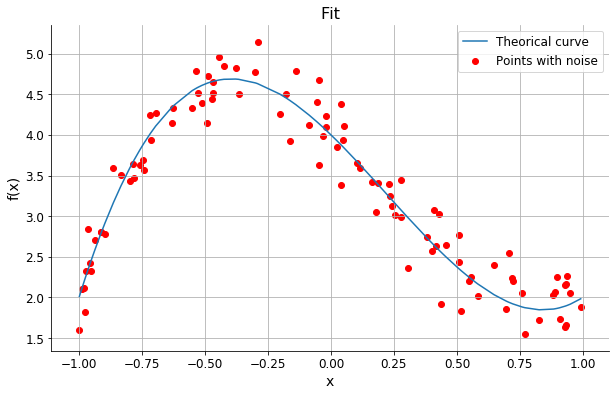

In [3]:
# plot training and target dataset
plt.figure(figsize=(10,6))
plt.plot(x_valid, y_target, label = 'Theorical curve')
plt.scatter(x_valid, y_valid, color='r', label="Points with noise")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Fit')
plt.legend()
plt.grid(True); plt.show()

In [4]:
loss_function = ['mse','mae','msle', 'logcosh']
activat = ['elu', 'selu','sigmoid', 'relu', 'softsign', 'tanh']
optimiz = ['adagrad','adadelta','sgd','rmsprop']

n_layers = [3,5,10]
n_neurons = [10,40,90]

### a) Number of layers and neurons and activation function

In order to see how the different number of layers ($HL$) and neurons per layer ($N$) affect the output I ran the previous code with $HL$ equal to $3$, $5$ and $10$ and $N$ equal to $10$, $40$ and $90$. The loss function I used was *mse* and the optimizer *sdg*. For the activiation function I tried six different types: *elu*, *selu*, *relu*, *sigmoid*, *softsign* and *tanh*.

From the following plots I cannot draw a conclusion that it's valid for all the different model. We can notice clearly that the *sigmoid* optimizer gives completely wrong results. The other observations that I can make are: 
- with a high number of parameters (number of layers and number of neurons) the model is more likely to make a bad prediction (e.g., in the case of *selu* with $HL=10$ and $N=40$ and $N=90$ and in the case of *softsign* with $HL=10$ and $N=10$). This suggests that a model too complex is not a wise choise. 
- there are cases where as the number of neurons grows the prediction improves in a substance way and other cases where this doesn't happen (e.g., the model with *elu* and $HL=5$).

Excluding the models with *selu*, *sigmoid* and *softsign*, the other three gave very similar results. The model with *relu* is the only one that predicted well the points with a high value of $x$. For this reason I chose to vary the optimizer and the loss function in this model to see if it would improve the prediction. 

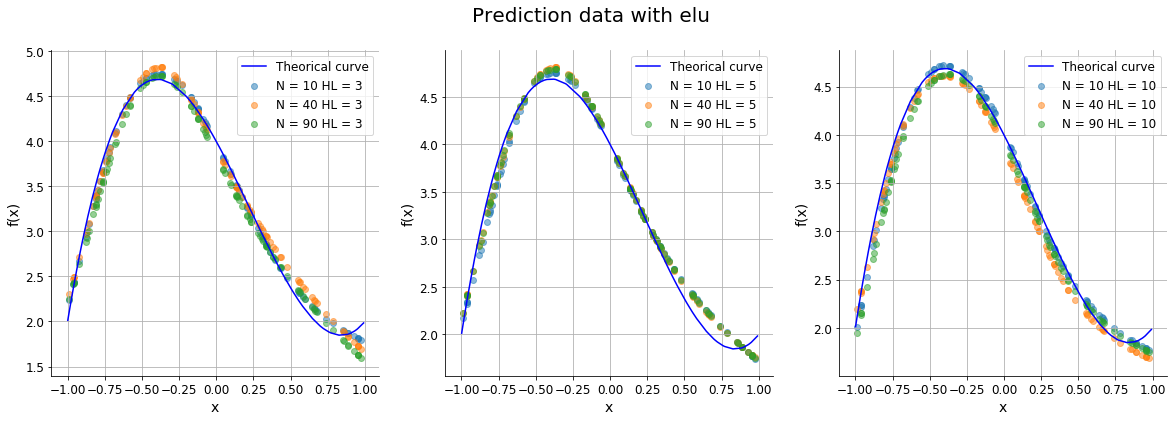

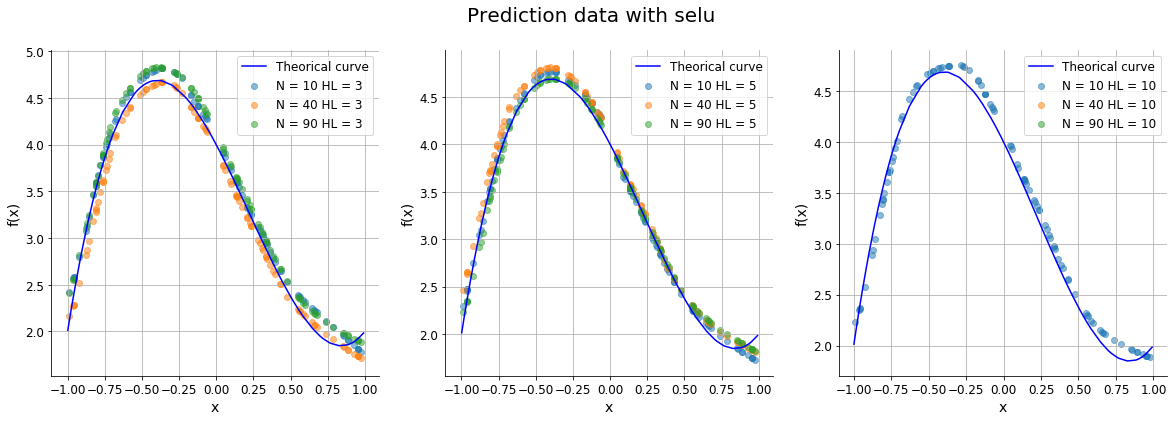

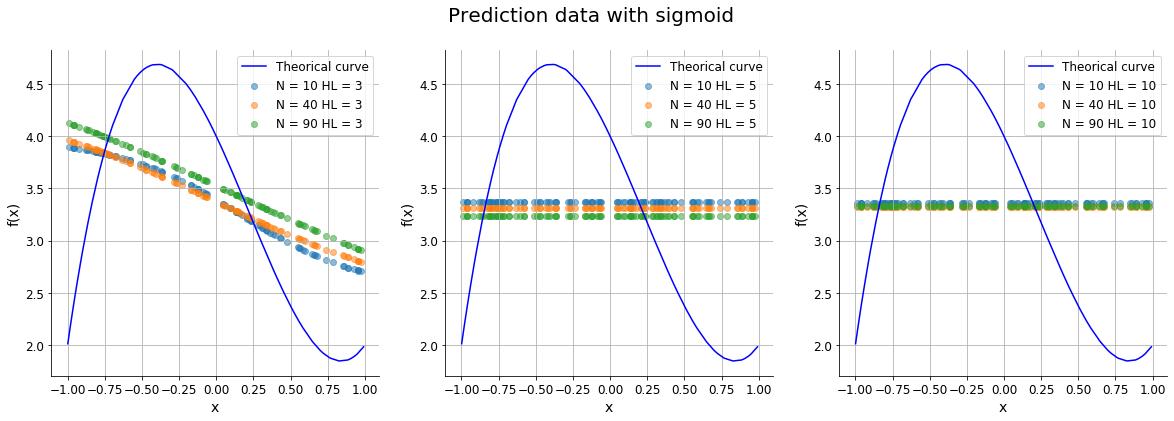

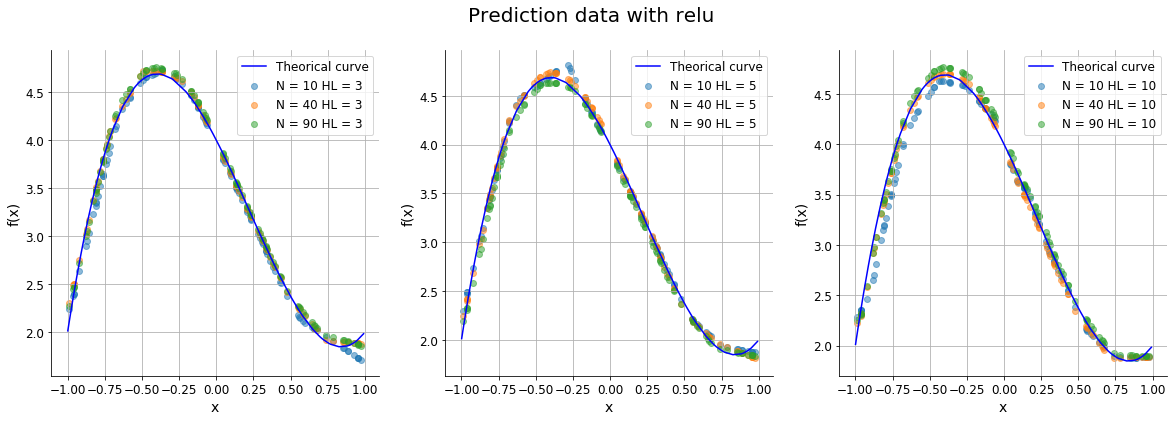

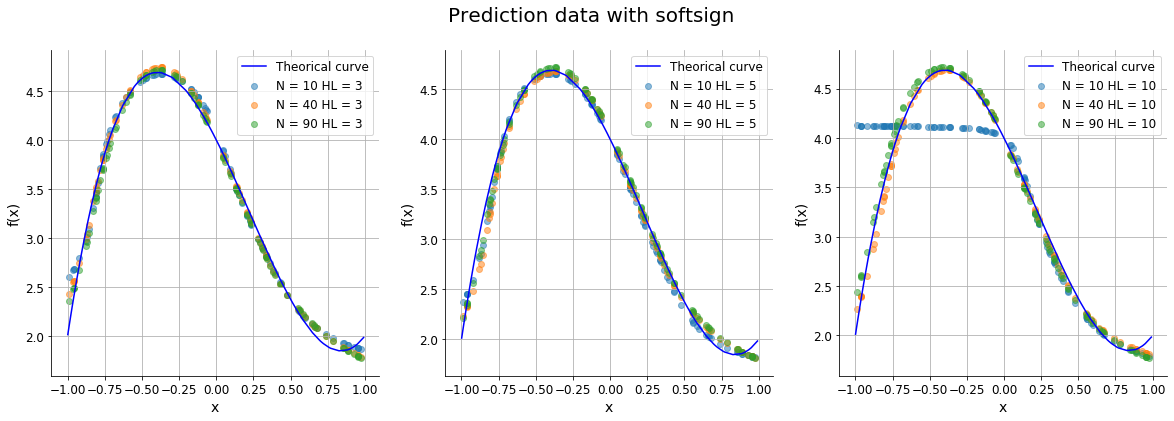

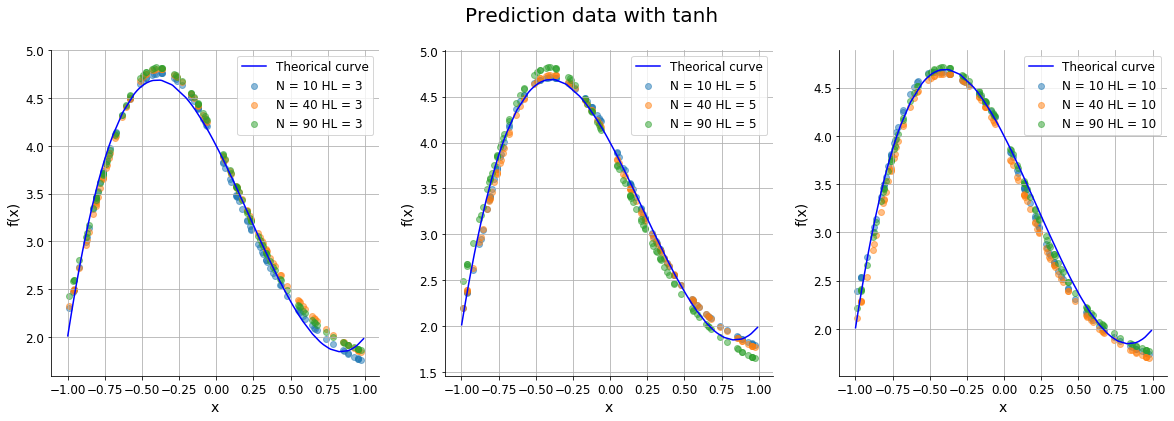

In [6]:
colors = ['blue','red','green']

for k in range(6):
    fig, ax = plt.subplots(1, 3, figsize=(20, 6))
    for i in range(3): #questi sono gli ax
        layers = n_layers[i]
        opt = optimiz[2]
        lossf = loss_function[0]
        act = activat[k]
        for j in range(3): #questi sono le tre curve per ax
            save_model_path=f'Saved/HL{layers}_N{n_neurons[j]}/{opt}/{act}/{lossf}'
            model_old = tf.keras.models.load_model(filepath=save_model_path)
            np.random.seed(0)
            x_predicted = np.random.uniform(-1, 1, 100)
            y_predicted = model_old.predict(x_predicted)
            ax[i].scatter(x_predicted, y_predicted,alpha =0.5, label = f"N = {n_neurons[j]} HL = {layers}")
        ax[i].plot(x_valid, y_target, label = 'Theorical curve', color = 'blue')
        ax[i].set_xlabel(r'x')
        ax[i].set_ylabel(r'f(x)')
        ax[i].legend()
        ax[i].grid(True)
    fig.suptitle(f'Prediction data with {act}', fontsize = 20)

### Optimizer

Text(0.5, 0.98, 'Prediction data with relu and adadelta')

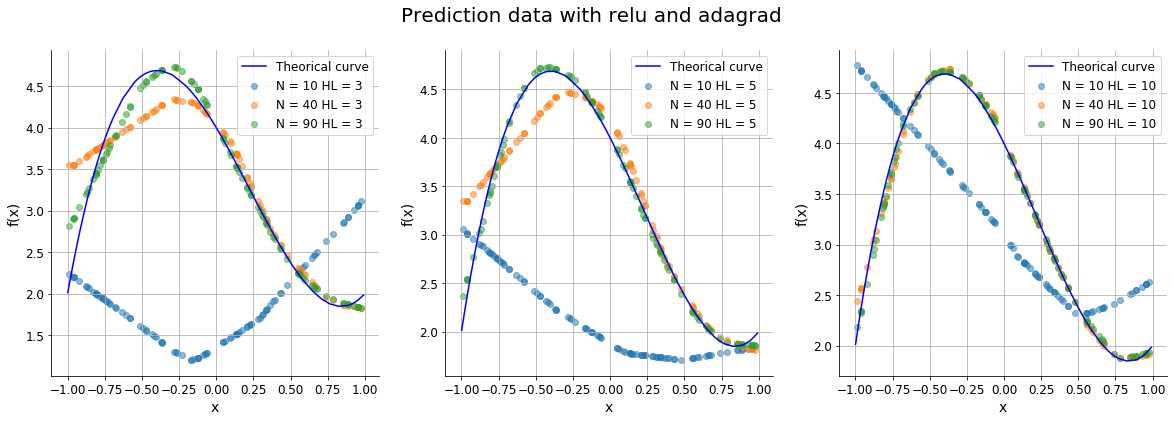

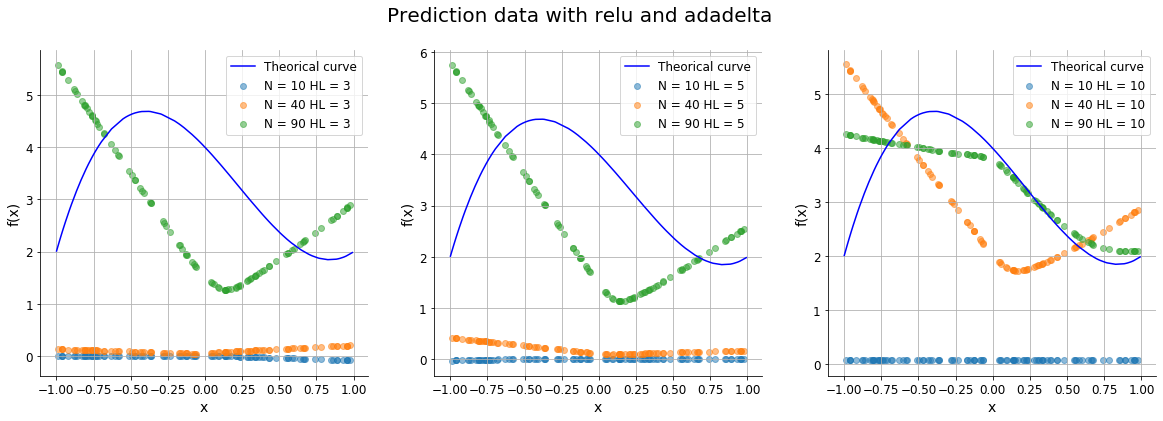

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
colors = ['blue','red','green']

for i in range(3): #questi sono gli ax
    layers = n_layers[i]
    opt = optimiz[0]
    lossf = loss_function[0]
    act = activat[3]
    for j in range(3): #questi sono le tre curve per ax
        save_model_path=f'Saved/HL{layers}_N{n_neurons[j]}/{opt}/{act}/{lossf}'
        model_old = tf.keras.models.load_model(filepath=save_model_path)
        np.random.seed(0)
        x_predicted = np.random.uniform(-1, 1, 100)
        y_predicted = model_old.predict(x_predicted)
        ax[i].scatter(x_predicted, y_predicted,alpha =0.5, label = f"N = {n_neurons[j]} HL = {layers}")
    ax[i].plot(x_valid, y_target, label = 'Theorical curve', color = 'blue')
    ax[i].set_xlabel(r'x')
    ax[i].set_ylabel(r'f(x)')
    ax[i].legend()
    ax[i].grid(True)
    
fig.suptitle('Prediction data with relu and adagrad', fontsize = 20)

fig, ax = plt.subplots(1, 3, figsize=(20, 6))

for i in range(3): #questi sono gli ax
    layers = n_layers[i]
    opt = optimiz[1]
    lossf = loss_function[0]
    act = activat[3]
    for j in range(3): #questi sono le tre curve per ax
        save_model_path=f'Saved/HL{layers}_N{n_neurons[j]}/{opt}/{act}/{lossf}'
        model_old = tf.keras.models.load_model(filepath=save_model_path)
        np.random.seed(0)
        x_predicted = np.random.uniform(-1, 1, 100)
        y_predicted = model_old.predict(x_predicted)
        ax[i].scatter(x_predicted, y_predicted,alpha =0.5, label = f"N = {n_neurons[j]} HL = {layers}")
    ax[i].plot(x_valid, y_target, label = 'Theorical curve', color = 'blue')
    ax[i].set_xlabel(r'x')
    ax[i].set_ylabel(r'f(x)')
    ax[i].legend()
    ax[i].grid(True)

fig.suptitle('Prediction data with relu and adadelta', fontsize = 20)

We can see that the function *adadelta* returns all bad results, while the optimizer *adagrad* deteriorize the prediction when the number of neurons per layer are small. In general a higher number of layers and neurons improves the prediction when this optimizer is used. In particular, the case with $HL=10$ and $N=40$ or $N=90$ gives really good predictions, but if we take a look at the loss function of the model we notice that it is really high indicating a clear overfitting. 

In [19]:
save_model_path=f'Saved/HL10_N40/adagrad/relu/mse'
model_old = tf.keras.models.load_model(filepath=save_model_path)
score = model_old.evaluate(x_valid, y_target,verbose=0)
print(f'Model with adagrad, relu, mse, HL = 10 and N = 40')
print('Test loss:', score[0])
print()
print('**************************')
print()
save_model_path=f'Saved/HL10_N90/adagrad/relu/mse'
model_old = tf.keras.models.load_model(filepath=save_model_path)
score = model_old.evaluate(x_valid, y_target,verbose=0)
print(f'Model with adagrad, relu, mse, HL = 10 and N = 90')
print('Test loss:', score[0])

Model with adagrad, relu, mse, HL = 10 and N = 40
Test loss: 36.07829666137695

**************************

Model with adagrad, relu, mse, HL = 10 and N = 90
Test loss: 34.95427322387695


The optimizer *rmsprop*, as we can see from the following plots, gives better outputs expecially for a small number of neurons and arbitrary number of layers. 

Text(0.5, 0.98, 'Prediction data with relu and rmsprop')

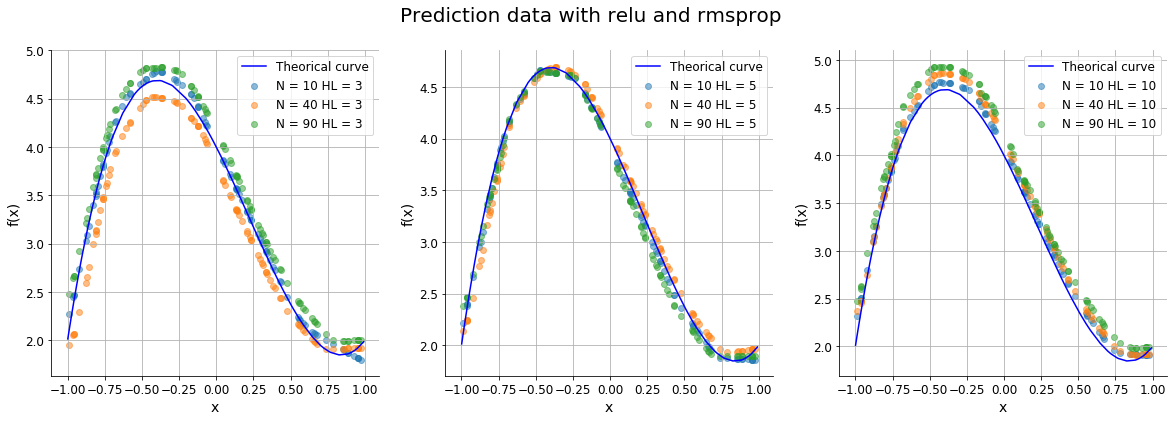

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(20, 6))

for i in range(3): #questi sono gli ax
    layers = n_layers[i]
    opt = optimiz[3]
    lossf = loss_function[0]
    act = activat[3]
    for j in range(3): #questi sono le tre curve per ax
        save_model_path=f'Saved/HL{layers}_N{n_neurons[j]}/{opt}/{act}/{lossf}'
        model_old = tf.keras.models.load_model(filepath=save_model_path)
        np.random.seed(0)
        x_predicted = np.random.uniform(-1, 1, 100)
        y_predicted = model_old.predict(x_predicted)
        ax[i].scatter(x_predicted, y_predicted,alpha =0.5, label = f"N = {n_neurons[j]} HL = {layers}")
    ax[i].plot(x_valid, y_target, label = 'Theorical curve', color = 'blue')
    ax[i].set_xlabel(r'x')
    ax[i].set_ylabel(r'f(x)')
    ax[i].legend()
    ax[i].grid(True)

fig.suptitle('Prediction data with relu and rmsprop', fontsize = 20)

### Loss function

In order to see how the different loss functions affect the output I chose to replicated the model with *relu* and *rmsprop* and *mse* changing the loss function to *mae*, *msle* and *logcosh*. 

We can see from the following plot that the use of an activation function different from *mse* in some cases improved, but in other worsened the prediction, depending on $HL$ and $N$. 

From the following plot I searched the better prediction and I selected: 
- $HL$ = 5 and $N=10$, *mse*, *rmsprop*, *relu*
- $HL$ = 10 and $N=10$, *mae*, *rmsprop*, *relu*
- $HL$ = 5 and $N=90$, *msle*, *rmsprop*, *relu*
- $HL$ = 5 and $N=40$, *logcosh*, *rmsprop*, *relu*

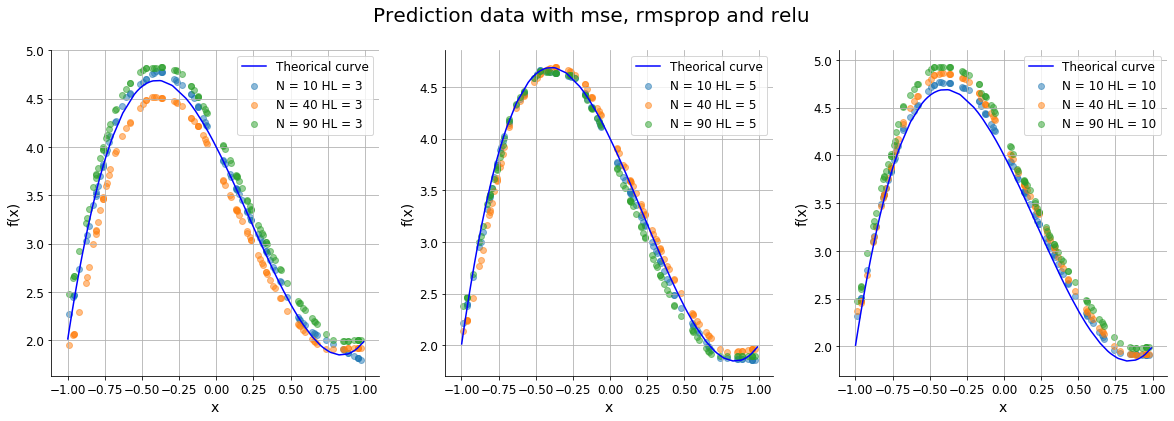

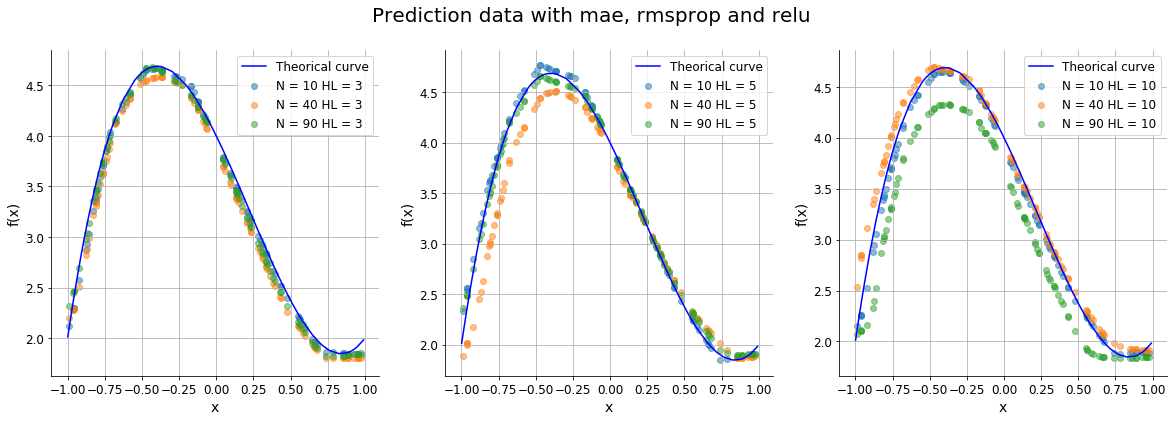

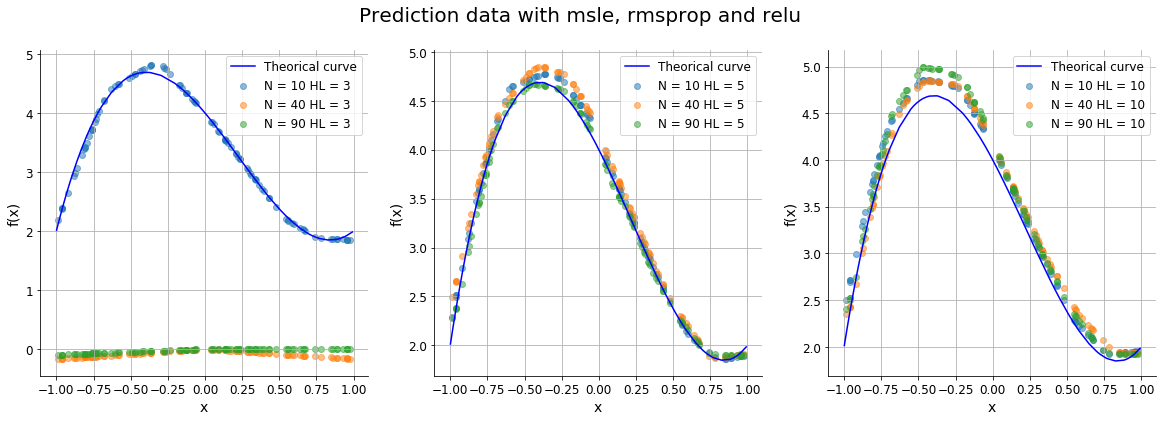

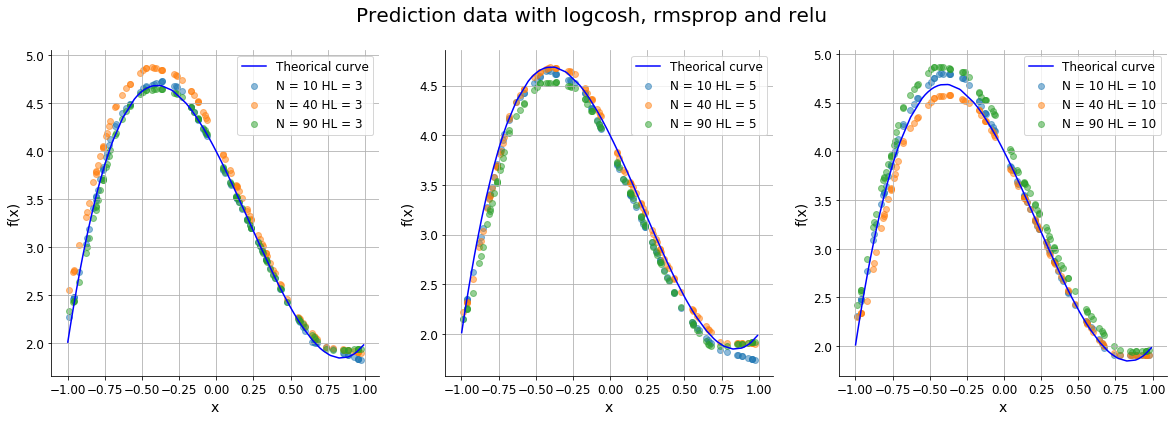

In [9]:
for k in range(4):
    fig, ax = plt.subplots(1, 3, figsize=(20, 6))
    for i in range(3): #questi sono gli ax
        layers = n_layers[i]
        opt = optimiz[3]
        lossf = loss_function[k]
        act = activat[3]
        for j in range(3): #questi sono le tre curve per ax
            save_model_path=f'Saved/HL{layers}_N{n_neurons[j]}/{opt}/{act}/{lossf}'
            model_old = tf.keras.models.load_model(filepath=save_model_path)
            np.random.seed(0)
            x_predicted = np.random.uniform(-1, 1, 100)
            y_predicted = model_old.predict(x_predicted)
            ax[i].scatter(x_predicted, y_predicted,alpha =0.5, label = f"N = {n_neurons[j]} HL = {layers}")
        ax[i].plot(x_valid, y_target, label = 'Theorical curve', color = 'blue')
        ax[i].set_xlabel(r'x')
        ax[i].set_ylabel(r'f(x)')
        ax[i].legend()
        ax[i].grid(True)
    fig.suptitle(f'Prediction data with {lossf}, {opt} and {act}', fontsize = 20)

## Best model

To choose the best model between the five selected we can look at the performance of the model, in particular at the test loss function. Here are the models again: 

1. $HL$ = 5 and $N=10$, *mse*, *rmsprop*, *relu*
2. $HL$ = 10 and $N=10$, *mae*, *rmsprop*, *relu*
3. $HL$ = 5 and $N=90$, *msle*, *rmsprop*, *relu*
4. $HL$ = 5 and $N=40$, *logcosh*, *rmsprop*, *relu*

In [10]:
bestHL =[5,10,5,5]
bestN = [10,10,90,40]
bestLo =['mse','mae','msle','logcosh']

for i in range(4):
    save_model_path=f'Saved/HL{bestHL[i]}_N{bestN[i]}/rmsprop/relu/{bestLo[i]}'
    model_old = tf.keras.models.load_model(filepath=save_model_path)
    score = model_old.evaluate(x_valid, y_target,verbose=0)
    print(f'Model {i+1})')
    print('Test loss:', score[0])
    print('**************************')

Model 1)
Test loss: 0.0036655745934695005
**************************
Model 2)
Test loss: 0.06195780262351036
**************************
Model 3)
Test loss: 0.00019592890748754144
**************************
Model 4)
Test loss: 0.0018173473654314876
**************************


From the performance here calculated the best model is the $3$-th.

Text(0.5, 0.98, 'Best Model')

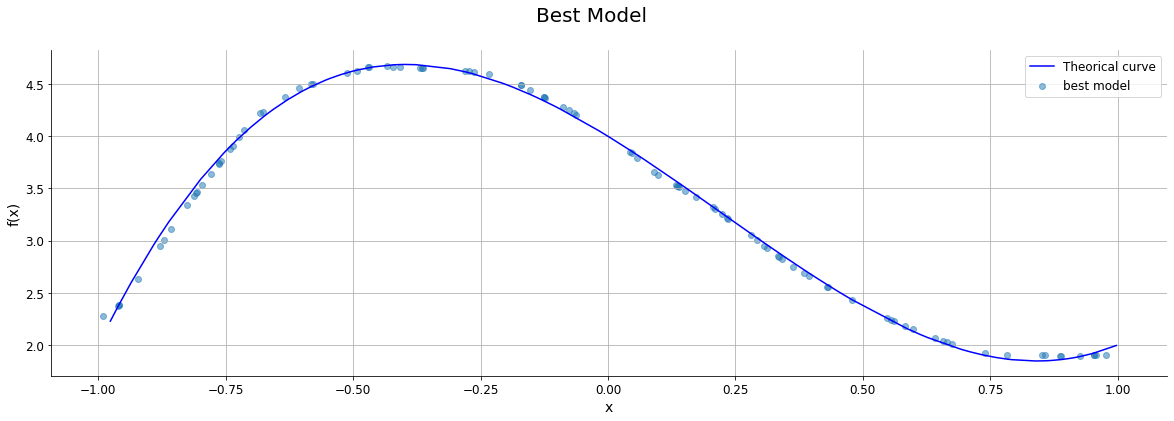

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

save_model_path=f'Saved/HL5_N90/rmsprop/relu/msle'
model_old = tf.keras.models.load_model(filepath=save_model_path)
np.random.seed(0)
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model_old.predict(x_predicted)
ax.scatter(x_predicted, y_predicted,alpha =0.5, label = 'best model')
x_valid = np.random.uniform(-1, 1, 100)
x_valid.sort()
y_target = a + b * x_valid + c * (x_valid**2) + d * (x_valid**3)
ax.plot(x_valid, y_target, label = 'Theorical curve', color = 'blue')
ax.set_xlabel(r'x')
ax.set_ylabel(r'f(x)')
ax.legend()
ax.grid(True)
fig.suptitle(f'Best Model', fontsize = 20)

## Outside the range of training 

If I tried to spread the intervall of the values of $x$ to $[-2,2]$ and to draw a prediction of the corresponding $y$ function. The result was that the prediction outside the intervall in which the system was trained is completely wrong. 

Text(0.5, 0.98, 'Prediction data outside range of training')

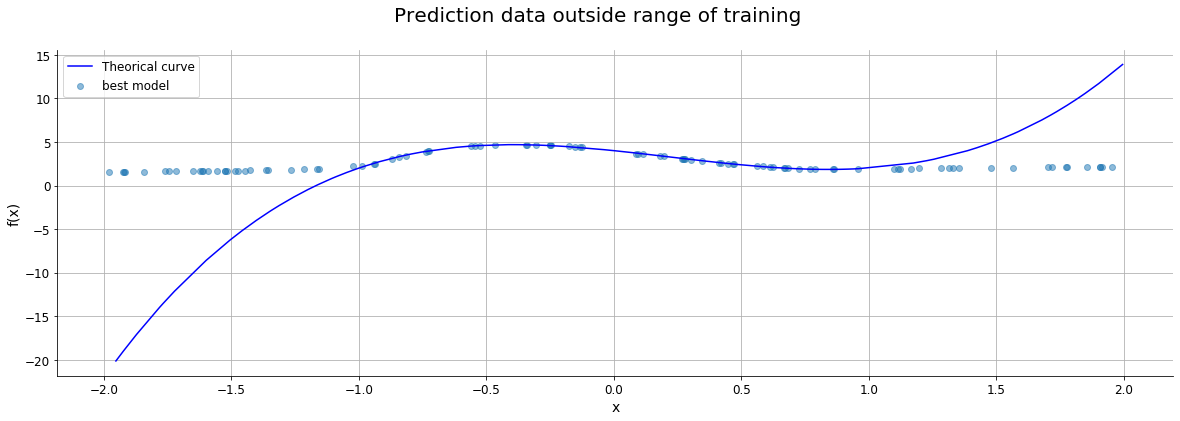

In [12]:

fig, ax = plt.subplots(1, 1, figsize=(20, 6))

save_model_path=f'Saved/HL5_N90/rmsprop/relu/msle'
model_old = tf.keras.models.load_model(filepath=save_model_path)
np.random.seed(0)
x_predicted = np.random.uniform(-2, 2, 100)
y_predicted = model_old.predict(x_predicted)
ax.scatter(x_predicted, y_predicted,alpha =0.5, label = 'best model')
x_valid = np.random.uniform(-2, 2, 100)
x_valid.sort()
y_target = a + b * x_valid + c * (x_valid**2) + d * (x_valid**3)
ax.plot(x_valid, y_target, label = 'Theorical curve', color = 'blue')
ax.set_xlabel(r'x')
ax.set_ylabel(r'f(x)')
ax.legend()
ax.grid(True)
fig.suptitle(f'Prediction data outside range of training', fontsize = 20)